# P5 : Catégoriser automatiquement des questions
# Analyse Exploratoire
## 1. Importation des données
### 1.1. Chargement des librairies

In [1]:
# Manipulation des données
import numpy as np
import pandas as pd

# Get files content
import os

# Visualisation des données
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Utilisation du module nb_black pour formater le code
%load_ext nb_black

<IPython.core.display.Javascript object>

### 1.2. Chargement des données
Les données sont disponibles sur le site https://data.stackexchange.com/stackoverflow/query/new

On récupère les données sur les 3 dernières années, par période de 6 mois. Voici un exemple de requête SQL rédigée pour récupérer les données (entre janvier 2020 et juin 2020) :

In [ ]:
SELECT Id, Title, Body, Tags, CreationDate, Score, ViewCount, AnswerCount,
CommentCount, FavoriteCount
From Posts
WHERE PostTypeId = 1
AND CreationDate BETWEEN '2020-01-01T00:00:00.00' AND '2020-06-30T23:59:59.999'
AND Score >= 1
AND ViewCount >=1
AND AnswerCount >=1
AND CommentCount >=1
AND FavoriteCount >=1
ORDER BY CreationDate

On récupère les Id, Title, Body, Tags des questions (PostTypeId = 1) posées entre 2019 et 2021, ainsi que CreationDate, Score, ViewCount, AnswerCount, CommentCount, FavoriteCount. 

On obtient 6 fichiers de données que l'on charge dans le même dataframe.

In [3]:
data = pd.DataFrame()

# Fusion de l'ensemble des 6 fichiers stockés dans le répertoire data
for idx, file in enumerate(os.listdir("./data_stack")):
    path = "./data_stack/" + file
    df = pd.read_csv(
        path,
        # mettre colonne Id en index
        index_col=0,
        # Mettre la colonne CreationDate au format datetime
        parse_dates=["CreationDate"],
    )
    data = pd.concat([data, df], axis=0)

# Tri par CreationDate
data.sort_values(by="CreationDate", inplace=True)
data.head(10)

,Title,Body,Tags,CreationDate,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount
Id,,,,,,,,,
53992220,Trying to put website into Maintenance Mode (3...,<p>I'm trying to put my webpage into Maintenan...,<.htaccess>,2019-01-01 00:02:08,1,975,2,13,1
53992527,Building Perf with Babeltrace (for Perf to CTF...,<p>I followed instructions provided by the exi...,<linux><perf>,2019-01-01 01:35:46,1,110,1,4,1
53992641,"How to return records in MySQL with ""custom"" o...",<p>I'm trying to return records based on their...,<mysql><sql>,2019-01-01 02:13:17,1,197,3,1,1
53992648,Why does java.util.scanner repeat loop for eve...,<p>I had a simple question. I've been explorin...,<java><java.util.scanner>,2019-01-01 02:15:41,1,76,2,1,2
53992694,What does netloc mean?,<p>I'm learning to make login function with <s...,<python><networking><flask><flask-login>,2019-01-01 02:30:21,22,16060,2,1,5
53992711,mycursor.executemany UPDATE not working as exp...,<h1>Question:</h1>\n\n<p>I have a python scrip...,<python><mysql><python-3.x><mysql-python>,2019-01-01 02:36:04,5,2728,1,8,1
53992822,CompactToken validation failed 80049228,<p>Some users are getting this error back when...,<microsoft-identity-platform>,2019-01-01 03:17:23,9,6914,2,2,2
53992855,How is it that a struct containing ValueTuple ...,<p>Consider the following types:</p>\n\n<ul>\n...,<c#><.net><generics><unmanaged><c#-7.3>,2019-01-01 03:31:29,13,957,1,16,1
53992860,How to prevent SQL injection when generating D...,<p>Goal: dynamically generate a <code>Prepared...,<java><jdbc><sql-injection>,2019-01-01 03:32:52,2,809,1,10,1


<IPython.core.display.Javascript object>

In [4]:
# Taille du dataset
data.shape

(164535, 9)

<IPython.core.display.Javascript object>

In [5]:
# Information sur les colonnes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164535 entries, 53992220 to 70546198
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Title          164535 non-null  object        
 1   Body           164535 non-null  object        
 2   Tags           164535 non-null  object        
 3   CreationDate   164535 non-null  datetime64[ns]
 4   Score          164535 non-null  int64         
 5   ViewCount      164535 non-null  int64         
 6   AnswerCount    164535 non-null  int64         
 7   CommentCount   164535 non-null  int64         
 8   FavoriteCount  164535 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 12.6+ MB


<IPython.core.display.Javascript object>

In [6]:
data.describe()

,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount
count,164535.000000,1.645350e+05,164535.000000,164535.000000,164535.000000
mean,4.757608,3.104881e+03,1.911253,3.589443,1.643462
std,11.873620,1.157719e+04,1.622349,3.107369,2.701974
min,1.000000,1.100000e+01,1.000000,1.000000,1.000000
25%,1.000000,1.770000e+02,1.000000,1.000000,1.000000
50%,2.000000,6.810000e+02,1.000000,3.000000,1.000000
75%,4.000000,2.412000e+03,2.000000,5.000000,2.000000
max,830.000000,1.719722e+06,53.000000,62.000000,278.000000


<IPython.core.display.Javascript object>

In [7]:
def perc_missing(df):

    """ Fonction qui retourne le pourcentage de valeurs manquantes 
    des colonnes d'un dataframe
        
    - Arguments :
        - df : dataframe 
    
    - Retourne :
        - les pourcentages,  classés par ordre décroissant,
        de valeurs manquantes des colonnes du dataframe
       
    """

    return (df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

<IPython.core.display.Javascript object>

In [8]:
perc_missing(data)

Title            0.0
Body             0.0
Tags             0.0
CreationDate     0.0
Score            0.0
ViewCount        0.0
AnswerCount      0.0
CommentCount     0.0
FavoriteCount    0.0
dtype: float64

<IPython.core.display.Javascript object>

Il n'y a pas de valeurs manquantes.

## 2. Analyse exploratoire

### 2.1. Univariée
#### CreationDate

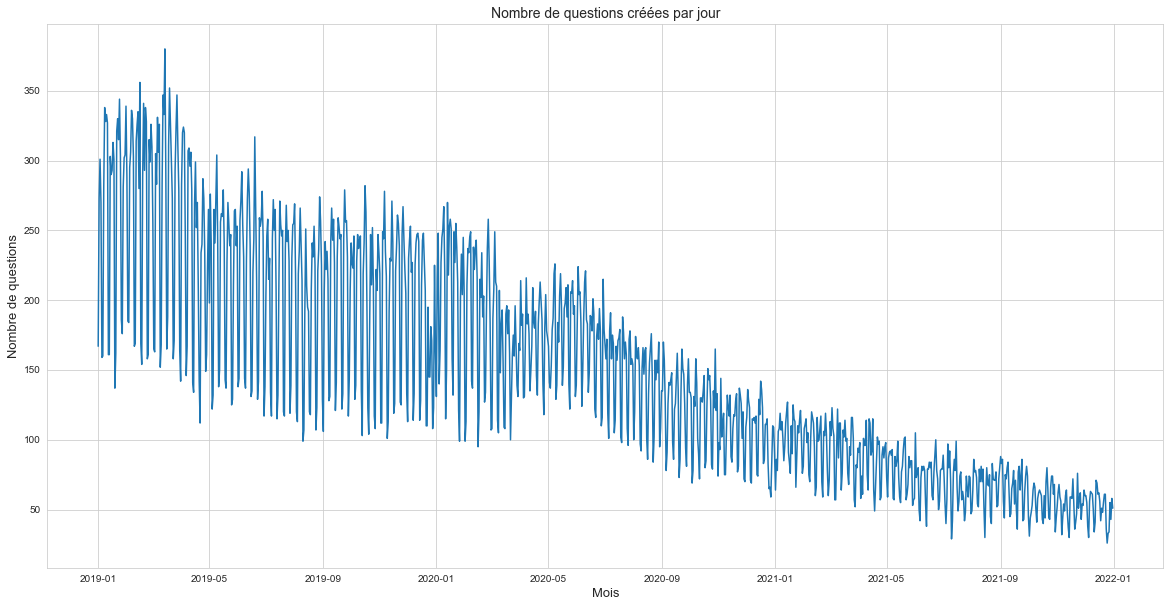

<IPython.core.display.Javascript object>

In [9]:
# Nombre de posts créés par jour
df_nb_by_day = data["CreationDate"].dt.date.value_counts()

plt.figure(figsize=(20, 10))
sns.lineplot(x=df_nb_by_day.index, y=df_nb_by_day.values)
plt.xlabel("Mois", size=13)
plt.ylabel("Nombre de questions", size=13)
plt.title("Nombre de questions créées par jour", size=14)
plt.show()

On observe une diminution du nombre de posts créés par jour au cours du temps (Pandémie ? autres outils d'aide utilisés ?).

On ne filtrera donc pas par CreationDate.

#### Score

In [10]:
def display_distrib(df, col):
    """ Fonction pour tracer la distribution d'une colonne d'un dataframe 
    et retourne les informations statistiques de cette colonne
        
    - Arguments :
        - df : dataframe
        - col : colonne du dataframe à représenter
    
    - Affiche :
        - 2 graphes pour la colonne du dataframe df
            - histplot représentant la distribution sous forme d'histogramme
            - boxplot correspondant
        - information statistiques de la colonne     
    """

    # Initialisation de la figure
    f, axes = plt.subplots(2, 1, figsize=(15, 8))
    plt.suptitle("Distribution de {}".format(col), size=14)

    # histogramme
    sns.histplot(x=col, data=df, kde=True, ax=axes[0], bins="auto")
    axes[0].set_ylabel("Nombre d'observations", size=13)
    axes[0].set_xlabel(" ")

    # boxplot
    sns.boxplot(x=col, data=df, ax=axes[1])
    axes[1].set_xlabel(col, size=13)
    plt.show()

    # Information statistique
    print(df[col].describe())

<IPython.core.display.Javascript object>

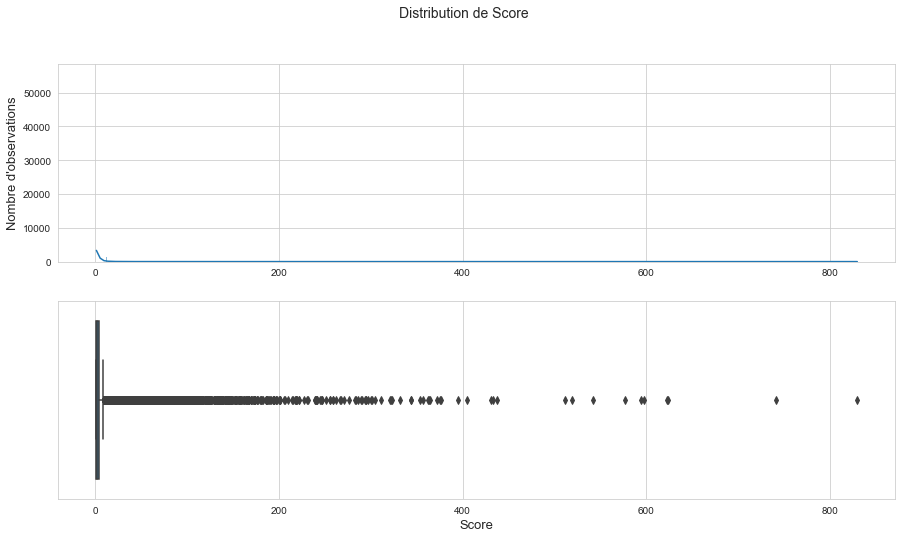

count    164535.000000
mean          4.757608
std          11.873620
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max         830.000000
Name: Score, dtype: float64


<IPython.core.display.Javascript object>

In [11]:
display_distrib(data, "Score")

Il y a beaucoup d'outliers. La majorité des observations est située entre 1 et 4, concentrée autour de 1.

#### ViewCount

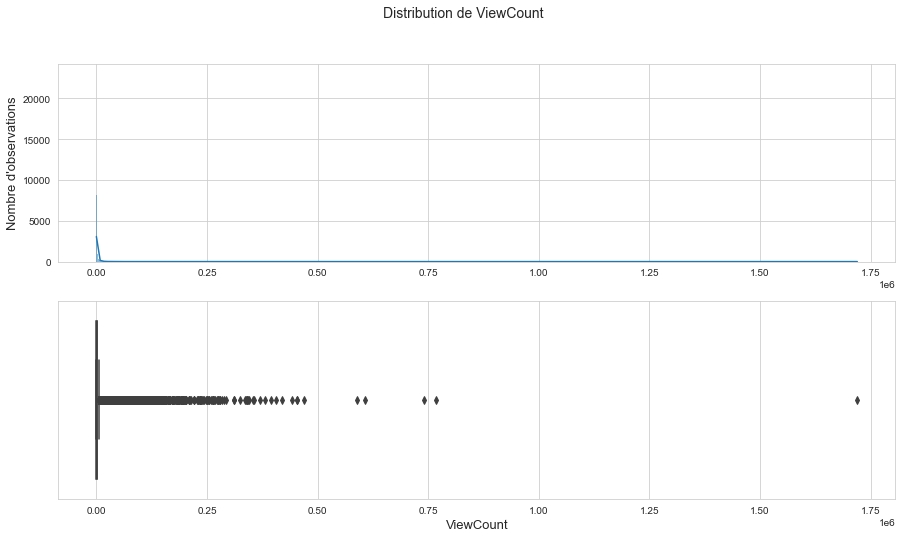

count    1.645350e+05
mean     3.104881e+03
std      1.157719e+04
min      1.100000e+01
25%      1.770000e+02
50%      6.810000e+02
75%      2.412000e+03
max      1.719722e+06
Name: ViewCount, dtype: float64


<IPython.core.display.Javascript object>

In [12]:
display_distrib(data, "ViewCount")

Ici aussi des outliers. La majorité des observations est comprise entre 11 et 2412.

#### AnswerCount

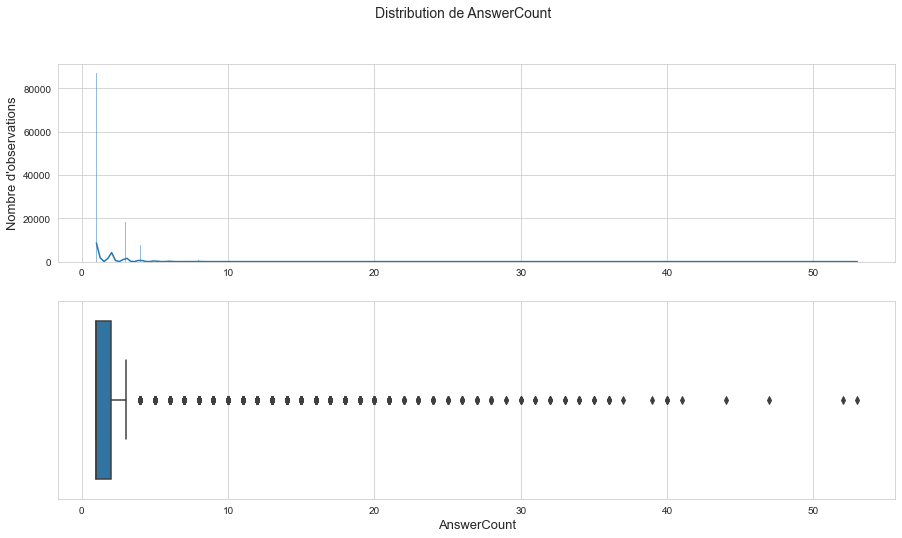

count    164535.000000
mean          1.911253
std           1.622349
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          53.000000
Name: AnswerCount, dtype: float64


<IPython.core.display.Javascript object>

In [13]:
display_distrib(data, "AnswerCount")

La distribution est plus étalée ici, avec moins d'outliers. La majorité des observations est comprise entre 1 et 2, plutôt centrée en 1.

#### CommentCount

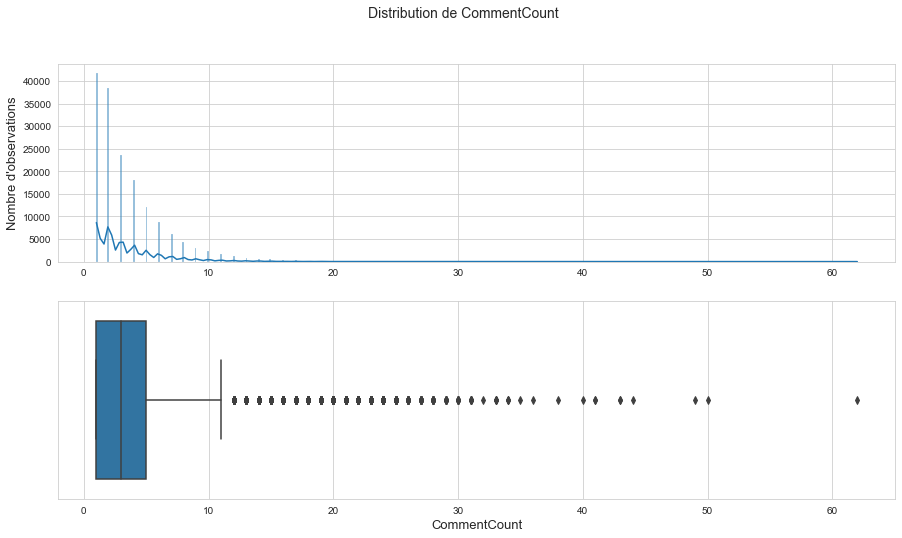

count    164535.000000
mean          3.589443
std           3.107369
min           1.000000
25%           1.000000
50%           3.000000
75%           5.000000
max          62.000000
Name: CommentCount, dtype: float64


<IPython.core.display.Javascript object>

In [14]:
display_distrib(data, "CommentCount")

La distribution est plus étalée ici, avec moins d'outliers. La majorité des observations est comprise entre 1 et 5, plutôt centrée en 1.

#### FavoriteCount

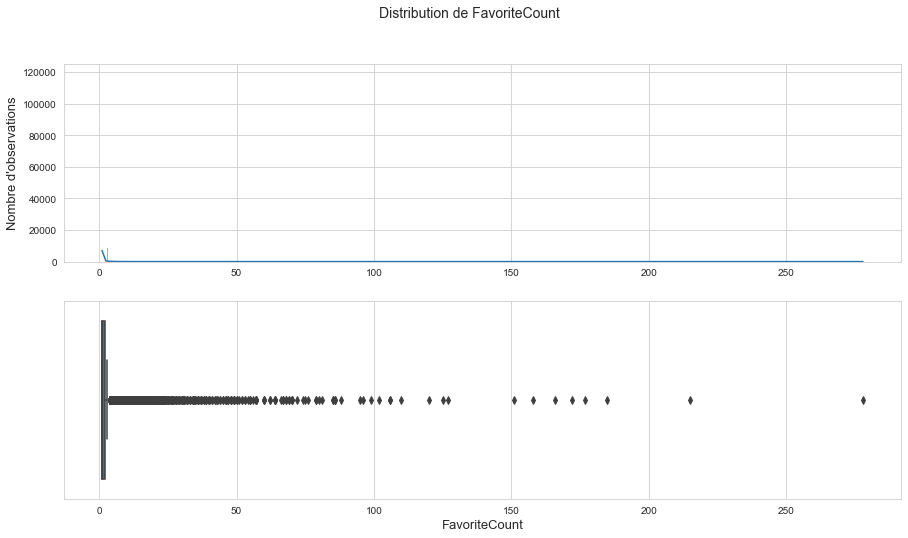

count    164535.000000
mean          1.643462
std           2.701974
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         278.000000
Name: FavoriteCount, dtype: float64


<IPython.core.display.Javascript object>

In [15]:
display_distrib(data, "FavoriteCount")

Pas mal d'outliers. La majorité des observations est comprise entre 1 et 2, plutôt centrée au tour de 1.

### 2.2. Bivariée

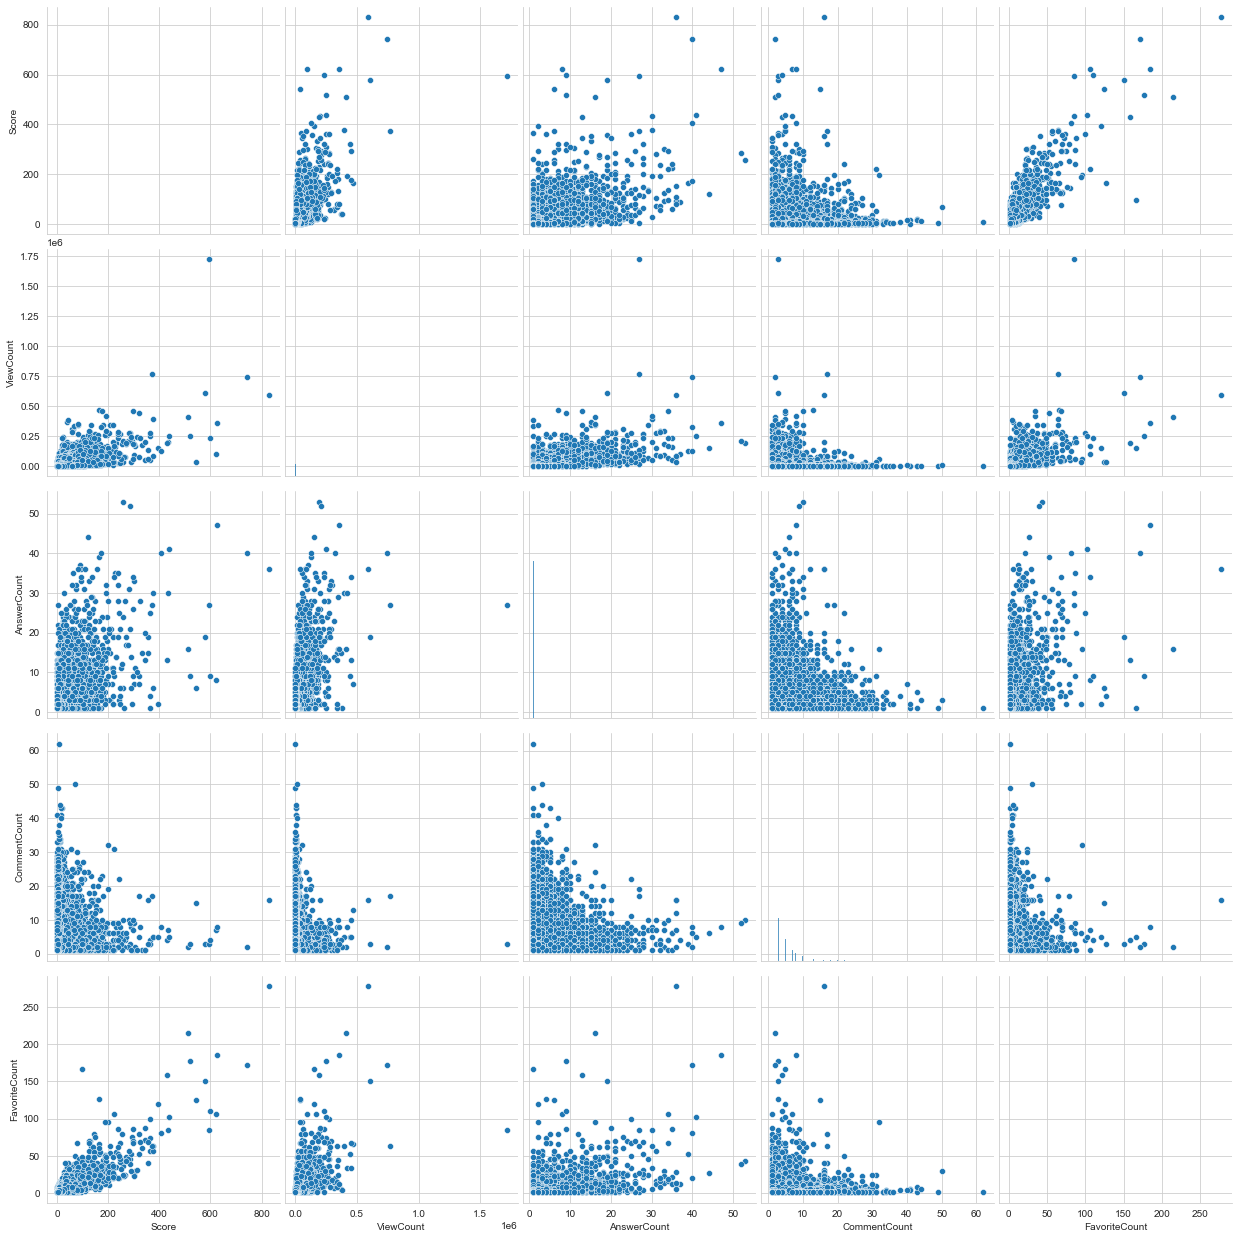

<IPython.core.display.Javascript object>

In [16]:
# Visualisation des colonnes numériques sous forme de pairplot
sns.pairplot(data, height=3.5)
plt.show()

A priori par de corrélation entre les variables numériques, sauf peut être entre Score et FavoriteCount.

On va visualiser cela avec une matrice des corrélations.

In [17]:
def mat_corr(df):

    """ Fonction pour tracer la matrice des corrélations entre
    les colonnes numériques d'un dataframe
        
    - Arguments :
        - df : dataframe  
    
    - Affiche :
        - 1 graphe de type heatmap indiquant pour chaque paire de
        colonnes numériques la valeurs du coefficient de corrélation
    """

    # variables dont on veut étudier les corrélations
    corr = df.select_dtypes("number").corr()

    # Génération d'un masque pour masquer le triangle supérieur et
    # n'afficher que la partie basse de la matrice
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Initialisation de la figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Générationd d'un mapping pour les couleurs
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Graphe de la matrice des corrélations (= heatmap)
    # avec le masque et affichage des valeurs de corrélation
    sns.heatmap(
        corr,
        mask=mask,
        cmap=cmap,
        vmax=1,
        center=0,
        square=True,
        linewidths=0.5,
        cbar=False,
        annot=True,
    )
    plt.title("Matrice des corrélations")
    plt.show()

<IPython.core.display.Javascript object>

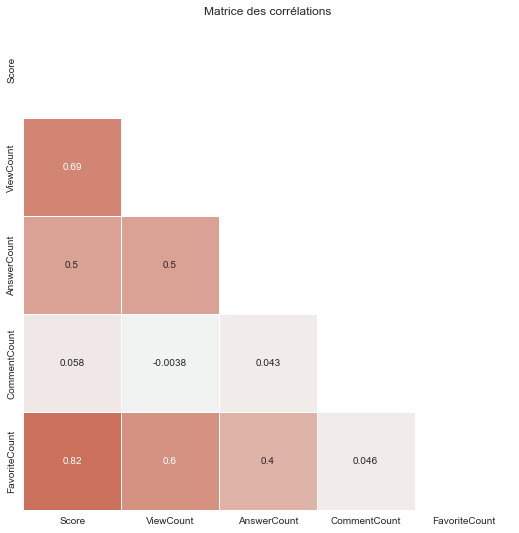

<IPython.core.display.Javascript object>

In [18]:
mat_corr(data)

On observe 
- une forte corrélation entre Score et FavoriteCount (0.82)
- une corrélation quasi inexistante de CommentCount avec les autres variables
- une corrélation moyenne entre 
    - Score et ViewCount
    - Score et AnswerCount
    - ViewCount et AnswerCount
    - AnswerCount et FavoriteCount

## 3. Filtrage des données

Les posts les plus anciens sont favorisés en terme de ViewCount, et d'après la matrice des corrélations, cela influence sur le Score et un peu sur AnswerCount et FavoriteCount. Par ailleurs, on a également vu que les posts anciens étaient plus nombreux. On va donc avoir un biais si l'on choisit une des variables actuelles pour filtrer les données.

On va donc créer une nouvelle variable ViewCountPerDay qui est le nombre de vues par jour, défini par le rapport entre ViewCount et CreationDateDelta (que l'on doit créée aussi) qui est le temps écoulé entre la CreationDate d'un post et la CreationDate du tout dernier post créé dans le dataset.
### 3.1. Création de nouvelles variables
#### CreationDateDelta

In [19]:
# Dernier post créé
date_max = data["CreationDate"].max()
date_max

Timestamp('2021-12-31 23:24:27')

<IPython.core.display.Javascript object>

In [20]:
data["CreationDateDelta"] = (date_max - data["CreationDate"]).dt.days

<IPython.core.display.Javascript object>

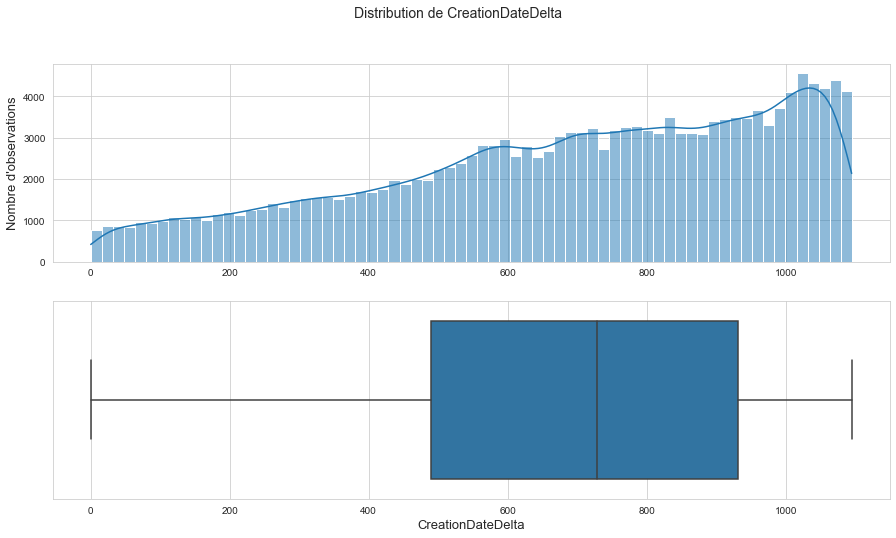

count    164535.000000
mean        686.773872
std         285.981837
min           0.000000
25%         490.000000
50%         728.000000
75%         931.000000
max        1095.000000
Name: CreationDateDelta, dtype: float64


<IPython.core.display.Javascript object>

In [21]:
display_distrib(data, "CreationDateDelta")

La médiane à 728 jours indique bien que les posts anciens (autour de 2 ans) sont prédominants.

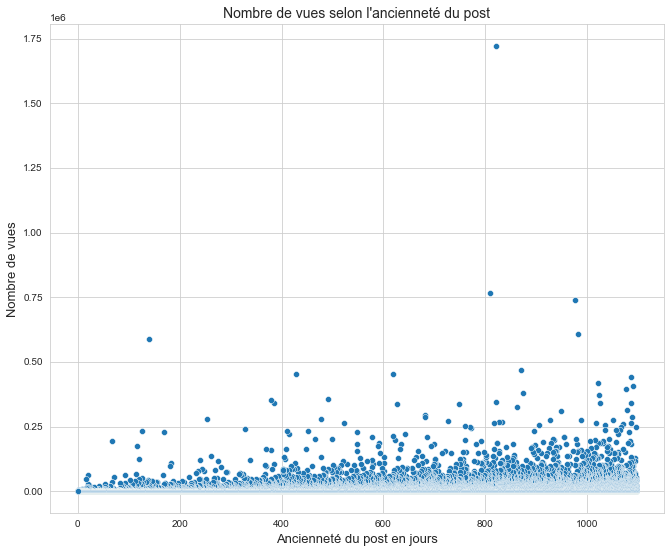

<IPython.core.display.Javascript object>

In [22]:
# Visualisation de ViewCount en fonction de CreationDateDelta
# Initialisation de la figure
f, ax = plt.subplots(figsize=(11, 9))

sns.scatterplot(x="CreationDateDelta", y="ViewCount", data=data)
plt.xlabel("Ancienneté du post en jours", size=13)
plt.ylabel("Nombre de vues", size=13)
plt.title("Nombre de vues selon l'ancienneté du post", size=14)
plt.show()

Il ne semble pas y avoir de lien évident.

#### ViewCountPerDay

In [23]:
data["ViewCountPerDay"] = data["ViewCount"] / (data["CreationDateDelta"] + 1e-2)
# On rajoute 1e-2 au dénominateur pour éviter la division par zéro

<IPython.core.display.Javascript object>

In [24]:
data["ViewCountPerDay"].describe()

count    164535.000000
mean         11.268226
std        1319.365444
min           0.019084
25%           0.374957
50%           1.161924
75%           3.597449
max      522800.000000
Name: ViewCountPerDay, dtype: float64

<IPython.core.display.Javascript object>

Pour des raisons de performance, on a splitté les graphes pour voir la distribution de ViewCountPerDay.

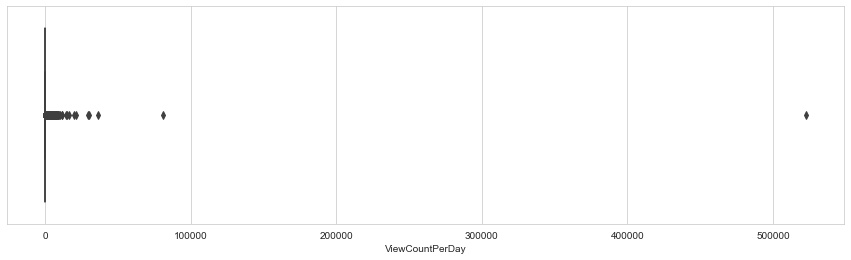

<IPython.core.display.Javascript object>

In [25]:
plt.figure(figsize=(15, 4))
sns.boxplot(x="ViewCountPerDay", data=data)
plt.show()

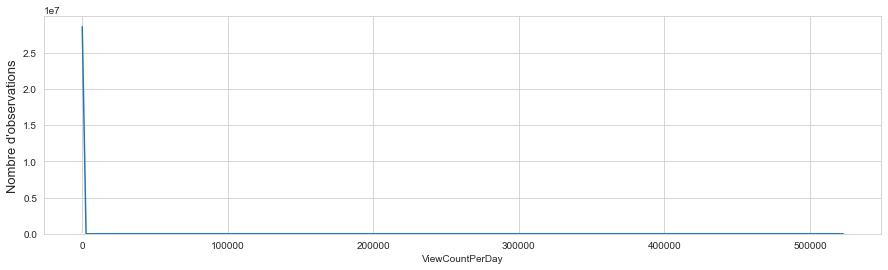

<IPython.core.display.Javascript object>

In [26]:
plt.figure(figsize=(15, 4))
sns.histplot(x="ViewCountPerDay", data=data, kde=True, bins=10)
plt.ylabel("Nombre d'observations", size=13)
plt.show()

### 3.2. Corrélation entre les variables
On va visualiser la matrice des corrélations avec les nouvelles variables.

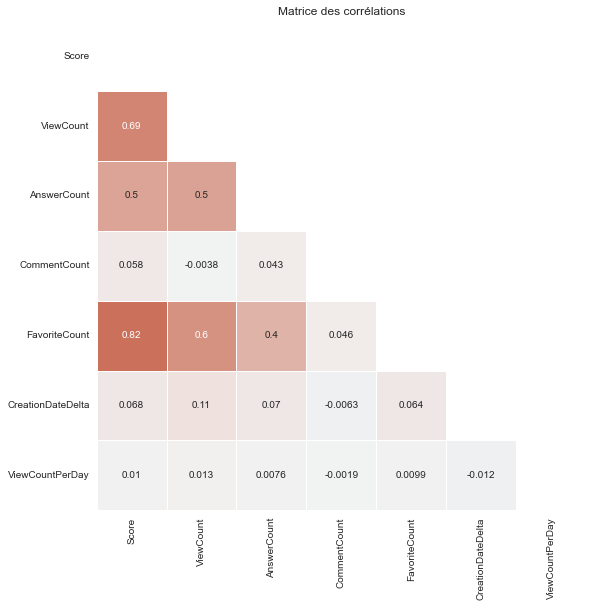

<IPython.core.display.Javascript object>

In [27]:
mat_corr(data)

Ainsi, on voit que ViewCountPerDay n'a quasiment aucun lien avec les autres variables. On peut donc filtrer les données sur cette variable.

### 3.3 Filtrage
On va filtrer les données pour n'avoir que les posts avec ViewCountPerDay >=3.

In [28]:
df_filt = data.loc[data["ViewCountPerDay"] >= 3]
df_filt.shape

(47032, 11)

<IPython.core.display.Javascript object>

In [29]:
(df_filt.shape[0]) / (data.shape[0])

0.2858479958671407

<IPython.core.display.Javascript object>

On a gardé presque 29% des données.

In [30]:
df_filt.sort_values(by=["Score", "ViewCount"], ascending=[False, False], inplace=True)
df_filt

/Users/gru/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Title,Body,Tags,CreationDate,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount,CreationDateDelta,ViewCountPerDay
Id,,,,,,,,,,,
68775869,Support for password authentication was remove...,<p>I got this error on my console when I tried...,<git><github><token><github-api><git-pull>,2021-08-13 16:49:34,830,589566,36,16,278,140,4210.884937
55921442,"How to fix ""ReferenceError: primordials is not...",<p>I have installed Node.js modules by 'npm in...,<node.js><sass><gulp><gulp-sass>,2019-04-30 12:57:10,741,740973,40,2,172,976,759.185869
63607158,"Xcode 12, building for iOS Simulator, but link...",<p>I am trying to get a large (and working on ...,<ios><xcode><xcode12><xcode12beta5><xcode12beta6>,2020-08-26 23:40:26,624,357368,47,8,185,491,727.822244
57456188,Why is the result of ('b'+'a'+ + 'a' + 'a').to...,<p>I was practicing some JavaScript when one o...,<javascript><type-conversion>,2019-08-12 05:50:43,623,97124,8,7,106,872,111.379457
62653114,"How to deal with this git warning? ""Pulling wi...",<p>After a <code>git pull origin master</code>...,<git>,2020-06-30 08:18:57,598,230395,9,4,110,549,419.655380
...,...,...,...,...,...,...,...,...,...,...,...
70537180,The ComposeView adapter does not work in a var...,<p>so the problem is i cannot see my preview o...,<android><android-jetpack-compose>,2021-12-30 22:10:41,1,25,1,1,1,1,24.752475
70528621,"How do I undo a merge , after I merged a branc...","<p><a href=""https://i.stack.imgur.com/nagnP.pn...",<version-control><git-merge><atlassian-sourcet...,2021-12-30 07:29:58,1,22,2,1,1,1,21.782178
70487244,ReactJS - You may need an appropriate loader t...,<p>I'm getting the error when I'm using '?'. W...,<reactjs>,2021-12-26 14:34:28,1,21,1,1,1,5,4.191617


<IPython.core.display.Javascript object>

In [68]:
# Export au format csv
df_filt.to_csv("./data/df_filt.csv")

<IPython.core.display.Javascript object>